In [2]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


### Import Libraries

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import log


### Data

In [1]:
amazon_prices = [1699.8, 1777.44, 2012.71, 2003.0, 1598.01, 1690.17, 1501.97, 1718.73, 1639.83, 1780.75, 1926.52, 1775.07, 1893.63]
ebay_prices = [35.98, 33.2, 34.35, 32.77, 28.81, 29.62, 27.86, 33.39, 37.01, 37.0, 38.6, 35.93, 39.5]

In [12]:
dataframe = pd.DataFrame({"Amazon Prices": amazon_prices, "eBay Prices": ebay_prices}).sort_values(by = ["Amazon Prices", "eBay Prices"])
dataframe

,Amazon Prices,eBay Prices
6,1501.97,27.86
4,1598.01,28.81
8,1639.83,37.01
5,1690.17,29.62
0,1699.80,35.98
7,1718.73,33.39
11,1775.07,35.93
1,1777.44,33.20
9,1780.75,37.00
12,1893.63,39.50


In [85]:
dataframe.describe()

,Amazon Prices,eBay Prices
count,13.000000,13.000000
mean,1770.586923,34.155385
std,154.236433,3.688599
min,1501.970000,27.860000
25%,1690.170000,32.770000
50%,1775.070000,34.350000
75%,1893.630000,37.000000
max,2012.710000,39.500000


### Calculate Log Return

In [17]:
def calculate_log_return(start_price, end_price):
    return log(end_price / start_price)

In [18]:
def get_returns(prices):
    returns = []
    for i in range(len(prices) - 1):
        start_price = prices[i]
        end_price = prices[i + 1]
        log_returns = calculate_log_return(start_price, end_price)
        returns.append(log_returns)
    return returns

**Amazon Log Returns**

In [19]:
amazon_returns= get_returns(amazon_prices)
amazon_returns

[0.044663529768886545,
 0.12430794584153733,
 -0.004836016009131401,
 -0.22588695153690044,
 0.056070010445170376,
 -0.11805153581831997,
 0.13480806622777397,
 -0.046993068074800755,
 0.082442045949722,
 0.07868064267475429,
 -0.0818754077815861,
 0.06465576316168306]

**eBay Log Returns**

In [20]:
ebay_returns = get_returns(ebay_prices)
ebay_returns

[-0.080413352599944,
 0.034052142745915476,
 -0.04708855595763511,
 -0.1287909136142863,
 0.02772725974321574,
 -0.061257840487993175,
 0.18106448560390354,
 0.10293169244250136,
 -0.00027023375384007574,
 0.042334363826560736,
 -0.07167967534535787,
 0.09472807078164892]

### Log Returns Display

In [74]:
def display_as_percentage(val):
    return '{:.1f}%'.format(val * 100)

In [75]:
# Display as Percentage
x = [display_as_percentage(returns) for returns in amazon_returns]
y = [display_as_percentage(returns) for returns in ebay_returns]

In [76]:
# Monthly returns of amazon
print("The monthly returns of amazon stock is " + ', ' .join(x))

The monthly returns of amazon stock is 4.5%, 12.4%, -0.5%, -22.6%, 5.6%, -11.8%, 13.5%, -4.7%, 8.2%, 7.9%, -8.2%, 6.5%


In [77]:
# Monthly returns of ebay
print("The monthly returns of ebay stock is " + ', ' .join(y))

The monthly returns of ebay stock is -8.0%, 3.4%, -4.7%, -12.9%, 2.8%, -6.1%, 18.1%, 10.3%, -0.0%, 4.2%, -7.2%, 9.5%


### Amazon Average

In [78]:
amazon_average = sum(amazon_returns) / len(amazon_returns)
amazon_average

0.008998752070732408

In [79]:
print("The monthly average of amazon stock is " + display_as_percentage(amazon_average))

The monthly average of amazon stock is 0.9%


### eBay Average

In [80]:
eBay_average = sum(ebay_returns) / len(ebay_returns)
eBay_average

0.007778120282057437

In [81]:
print("The monthly average of eBay stock is " + display_as_percentage(eBay_average))

The monthly average of eBay stock is 0.8%


### Annual Returns

In [83]:
# Annual Returns of Amazon
print("The annual return of amazon stock is " + display_as_percentage(sum(amazon_returns)))

The annual return of amazon stock is 10.8%


In [84]:
# Annual Returns of eBay
print("The annual return of ebay stock is " + display_as_percentage(sum(ebay_returns)))

The annual return of ebay stock is 9.3%


### Variance

In [86]:
# Amazon Variance
amazon_variance = np.var(amazon_returns)
amazon_variance

0.010738060556609726

In [88]:
print("Amazon's variance is " + display_as_percentage(amazon_variance))

Amazon's variance is 1.1%


In [87]:
# eBay Variance
ebay_variance = np.var(ebay_returns)
ebay_variance

0.007459046435081462

In [89]:
print("Ebay's variance is " + display_as_percentage(ebay_variance))

Ebay's variance is 0.7%


### Standard Deviation

In [90]:
amazon_std = np.std(amazon_returns)
amazon_std

0.10362461366205293

In [91]:
ebay_std = np.std(ebay_returns)
ebay_std

0.08636577120064096

In [92]:
print("Amazon's standard deviation is " + display_as_percentage(amazon_std))

Amazon's standard deviation is 10.4%


In [93]:
print("Ebay's standard deviation is " + display_as_percentage(ebay_std))

Ebay's standard deviation is 8.6%


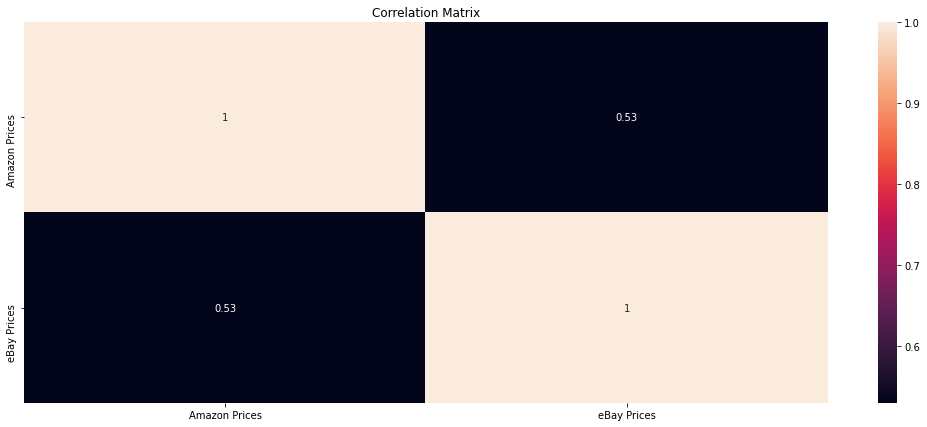

In [98]:
plt.figure(figsize = (18, 7))
correlation = dataframe.corr()
sns.heatmap(correlation, annot = True)
plt.title("Correlation Matrix")
plt.show()

In [102]:
from scipy import stats

In [103]:
correlation = stats.pearsonr(dataframe["Amazon Prices"], dataframe["eBay Prices"])

print("The correlation between Amazon and Ebay is " + str(correlation))

The correlation between Amazon and Ebay is (0.5304921683060398, 0.062171622642709166)
